In [1]:
# Import machine-learning packages
import torch
from torch import nn

# Import plotting packages
from IPython.display import Image. HTML
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import time
import base64
import numpy as np

%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [44]:
n = 63
x = torch.ones(n,1)
y = torch.ones(n,1)
claims = [108,19,13,124,40,57,23,14,45,10,5,48,11,23,7,2,24,6,3,23,6,9,9,3,29,7,4,20,7,4,0,25,6,5,22,11,61,12,4,16,13,60,41,37,55,41,11,27,8,3,17,13,13,15,8,29,30,24,9,31,14,53,26]
payment = [392.5,46.2,15.7,422.2,119.4,170.9,	56.9,	77.5,	214,	65.3,	20.9,	248.1,	23.5,	39.6,	48.8,	6.6,	134.9,	50.9,	4.4,	113,	14.8,	48.7,	52.1,	13.2,	103.9,	77.5,	11.8,	98.1,	27.9,	38.1,	0,	69.2,	14.6,	40.3,	161.5,	57.2,	217.6,	58.1,	12.6,	59.6,	89.9,	202.4,	181.3,	152.8,	162.8,	73.4,	21.3,	92.6,	76.1,	39.9,	142.1,	93,	31.9,	32.1,	55.6,	133.3,	194.5,	137.9,	87.4,	209.8,95.5,	244.6,187.5]
for i in range(n):
	x[i]= claims[i]
	y[i]= payment[i]
x = x[0:40]
y = y[0:40]

Text(0.5, 0, 'Claims')

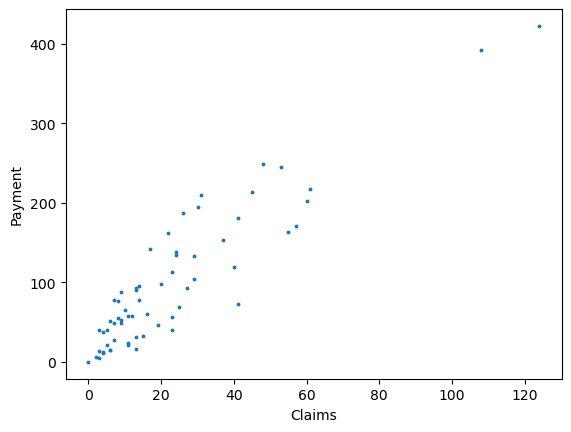

In [14]:
plt.plot(x, y, ".", markersize=3.5)
plt.ylabel("Payment")
plt.xlabel("Claims")

In [45]:


class Simple_Neural_Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.Dense1 = nn.Linear(1, 30)
        self.Dense2 = nn.Linear(30, 30)
        self.Dense3 = nn.Linear(30, 1)

        self.relu = nn.ReLU()

    def forward(self, x):
        # This method is automatically executed when
        # we call a object of this class
        x = self.Dense1(x)
        x = self.relu(x)
        x = self.Dense2(x)
        x = self.relu(x)
        x = self.Dense3(x)

        return x


In [46]:
neural_net = Simple_Neural_Net()

In [47]:
net_input = torch.randn(1, 1)
out = neural_net(net_input)
print(
    f"The output of the random input {net_input.item():.4f} from untrained network is: {out.item():.4f}"
)

The output of the random input 0.6653 from untrained network is: -0.3083


In [48]:
# Here we use the Adam optimizer.
learning_rate = 0.005
optimizer = torch.optim.Adam(neural_net.parameters())

In [49]:
# MSE loss function
loss_fn = torch.nn.MSELoss()

In [50]:
def train_step(model, loss_fn, optimizer):
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices

    pred = model(x)
    loss = loss_fn(pred, y)

    # Backpropagation
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    loss = loss.item()
    return loss

In [51]:
epochs = 1000
Loss = np.zeros(epochs)
for t in range(epochs):
    Loss[t] = train_step(neural_net, loss_fn, optimizer)
    if np.mod(t, 200) == 0:
        print(f"Loss at Epoch {t+1} is ", Loss[t])

Loss at Epoch 1 is  17941.22265625
Loss at Epoch 201 is  819.8282470703125
Loss at Epoch 401 is  813.1939697265625
Loss at Epoch 601 is  805.8515014648438
Loss at Epoch 801 is  798.3572387695312


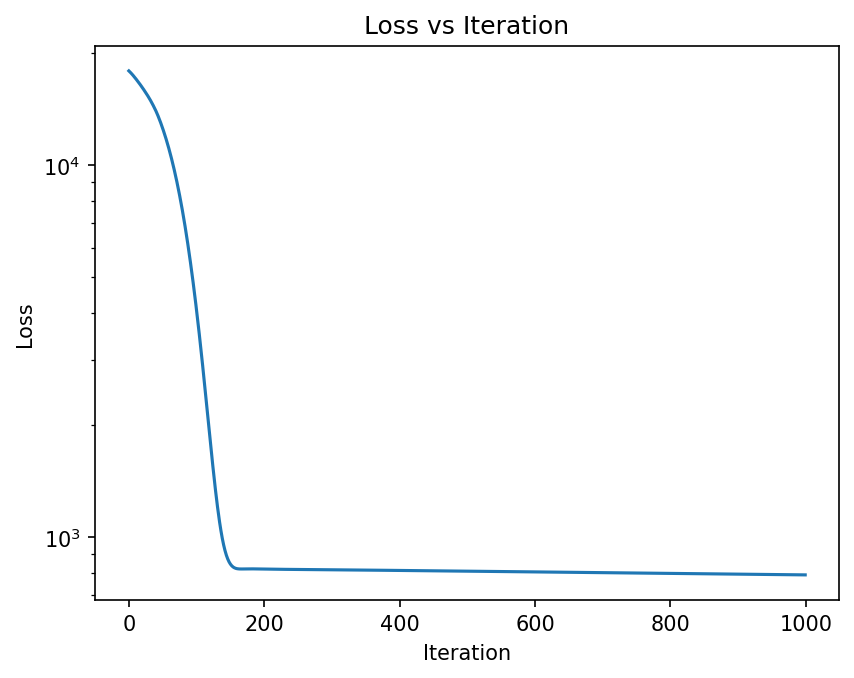

In [52]:
plt.figure(dpi=150)
plt.plot(Loss)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.yscale("log")
plt.title("Loss vs Iteration")
plt.show();

In [53]:
# Generate some points where the predictions of the model will be tested.
# Here we pick the testing domain to be larger than the training domain to check if the model
# has any skill at extrapolation.
x_test = torch.linspace(0, 80, 501).reshape(501, 1)

# Generate the predictions from the trained model.
pred = neural_net(x_test).detach().numpy()

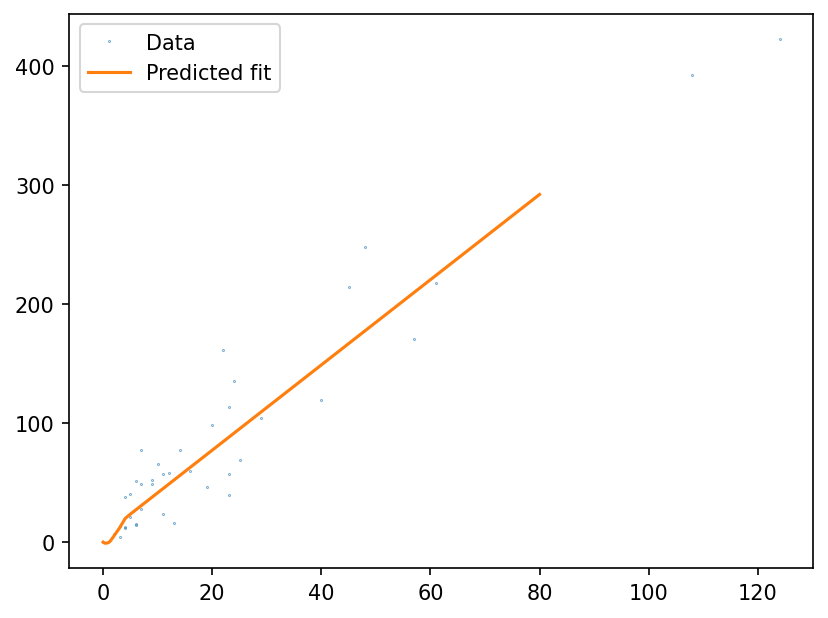

In [54]:
plt.figure(dpi=150)

plt.plot(x, y, ".", markersize=0.5, label="Data")
plt.plot(x_test, pred, markersize=0.5, label="Predicted fit")

plt.legend()